 # Wpływ pandemi COVID-19 na zmianę jakości powietrza w UK #

* * * 

## 1. Wstęp
Celem niniejszego badania jest ocena wpływu pandemii COVID-19 na zmiany jakości powietrza na obszarze Wielkiej Brytanii. Punktem wyjścia dla analizy była wspólna hipoteza badawcza członków zespołu, zgodnie z którą ograniczenia mobilności społecznej, wymuszone przez wprowadzone lockdowny oraz restrykcje sanitarne, mogły znacząco wpłynąć na poziom zanieczyszczeń powietrza w analizowanym okresie.

Podstawowym źródłem danych wykorzystanym w badaniu był zbiór [Hourly Air Quality Data from the UK DEFRA AURN network for the years 2015–2023](https://www.kaggle.com/datasets/airqualityanthony/uk-defra-aurn-air-quality-data-2015-2023), zawierający szczegółowe, godzinowe dane<br /> 
o jakości powietrza pozyskane z Automatycznej Sieci Monitorującej (Automatic Urban and Rural Network – AURN). Dane obejmują pomiary dla kluczowych zanieczyszczeń atmosferycznych, takich jak: tlenek węgla (CO), tlenki azotu (NOₓ), dwutlenek azotu (NO₂), tlenek azotu (NO), ozon (O₃) oraz dwutlenek siarki (SO₂). Każdy pomiar został dodatkowo wzbogacony o dane meteorologiczne oraz współrzędne geoprzestrzenne punktów pomiarowych, co umożliwia precyzyjne przypisanie wyników do konkretnych lokalizacji i warunków atmosferycznych.

Na potrzeby badania ocena jakość powietrza określana na podstawie stężeń CO, NOₓ, NO₂, NO, O₃ i SO₂ została określona za pomocą indeksu jakości powietrza (AQI – Air Quality Index).<br />
W zależności od wartości AQI przypisuje się jedną z kategorii, np.:

| AQI      | Kategoria (PL)                              | Odpowiednik US-EPA / WHO       |
| -------- | ------------------------------------------- | ------------------------------ |
| <span style="color: black; background-color: green;"> 0–50     | Bardzo dobra (zielony)                      | Good                           |
| <span style="color: black; background-color: yellow;"> 51–100   | Dobra / Umiarkowana                         | Moderate                       |
| <span style="color: black; background-color: orange;"> 101–150  | Umiarkowana / Uciążliwa dla wrażliwych grup | Unhealthy for Sensitive Groups |
| <span style="color: black; background-color: red;"> 151–200+ | Zła, bardzo zła, ekstremalna                | Unhealthy–Hazardous            |


Aby zbadać potencjalny związek pomiędzy skalą rozprzestrzeniania się wirusa SARS-CoV-2 a jakością powietrza – pośrednio, poprzez wpływ lockdownów na aktywność społeczną i przemysłową 
<br /> – w analizie uwzględniono również dane ze strony [UKHSA data dashboard](hhttps://ukhsa-dashboard.data.gov.uk/). Wykorzystano plik ltla_newCasesBySpecimenDate. Zawiera on informacje o liczbie zakażeń w poszczególnych miastach Wielkiej Brytanii w okresie od marca 2020 do stycznia 2022 roku.

Dwa zestawy danych zostały zintegrowane na podstawie daty oraz lokalizacji (region geograficzny), przy czym dane o jakości powietrza zostały agregowane do poziomu dziennego w celu umożliwienia spójnego połączenia z dobowymi danymi dotyczącymi liczby zakażeń. Lokalizacje punktów pomiarowych zostały przypisane do odpowiadających im miast, zgodnie z systemem klasyfikacji przestrzennej stosowanym w pliku  ltla_newCasesBySpecimenDate. Tak przygotowany zbiór umożliwia równoległą analizę zmienności poziomu zanieczyszczeń oraz przebiegu fal pandemicznych w ujęciu regionalnym i czasowym.

Zintegrowany zbiór danych pozwala na weryfikację następujących pytań badawczych:

* Czy pandemia COVID-19 miała istotny wpływ na jakość powietrza w Wielkiej Brytanii?

* Jakie zmiany w poziomach poszczególnych zanieczyszczeń atmosferycznych można zaobserwować w okresie przed i w trakcie pandemii?

* Czy różnice te są skorelowane z intensywnością poszczególnych fal zakażeń oraz wprowadzanymi ograniczeniami społecznymi?

* W jakim stopniu efekty pandemii były trwałe lub przejściowe?

Dla celów porównawczych okres pandemii został podzielony na sześć głównych faz, zgodnych z kalendarzem epidemiologicznym:
1. Początek epidemii i globalna eskalacja (grudzień 2019 – marzec 2020)

1. Pierwsza fala i lockdowny (marzec – czerwiec 2020)

1. Okres letni – częściowe poluzowania (lipiec – wrzesień 2020)

1. Druga fala pandemii (październik 2020 – styczeń 2021)

1. Początek kampanii szczepień (grudzień 2020 – marzec 2021)

1. Dominacja wariantu Delta i kolejne fale (kwiecień – grudzień 2021)



## 2. Czyszczenie i porządkowanie danych



In [4]:
#import bibliotek

import kagglehub as kg
import pandas as pd

c:\Users\DAMIANGUTOWSKI\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import danych o jakości powietrza

path = kg.dataset_download("airqualityanthony/uk-defra-aurn-air-quality-data-2015-2023")

In [3]:
# wczytanie danych do ramki danych pandas i obróbka danych

df_air = pd.read_csv(path + "/AURN_2015_2023.csv")

In [4]:
#pokaz wszystkie kolumny
pd.set_option('display.max_columns', None)
#jakie są site_types
#print(df_air['site_type'].unique())
df_air

,Unnamed: 0,site,code,date,co,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type
0,1,Aberdeen Erroll Park,ABD9,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
1,2,Aberdeen Erroll Park,ABD9,2021-10-01 01:00:00,NaN,18.54277,14.25911,2.79374,35.32389,NaN,4.850,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
2,3,Aberdeen Erroll Park,ABD9,2021-10-01 02:00:00,NaN,13.90708,12.77317,0.73952,30.23486,NaN,4.325,2.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
3,4,Aberdeen Erroll Park,ABD9,2021-10-01 03:00:00,NaN,15.88038,13.32908,1.66392,21.10453,NaN,5.375,3.561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
4,5,Aberdeen Erroll Park,ABD9,2021-10-01 04:00:00,NaN,20.20285,18.26575,1.26334,16.41463,NaN,5.450,3.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252609,11252610,York Fishergate,YK11,2023-11-05 19:00:00,NaN,24.86250,17.02125,5.11393,NaN,NaN,30.918,27.000,NaN,NaN,NaN,NaN,2.5,245.2,6.6,53.951889,-1.075861,Urban Traffic
11252610,11252611,York Fishergate,YK11,2023-11-05 20:00:00,NaN,38.44125,29.64375,5.73758,NaN,NaN,79.228,73.000,NaN,NaN,NaN,NaN,2.6,248.0,6.7,53.951889,-1.075861,Urban Traffic
11252611,11252612,York Fishergate,YK11,2023-11-05 21:00:00,NaN,35.38125,28.87875,4.24082,NaN,NaN,85.992,85.000,NaN,NaN,NaN,NaN,2.5,239.1,6.8,53.951889,-1.075861,Urban Traffic
11252612,11252613,York Fishergate,YK11,2023-11-05 22:00:00,NaN,35.76375,26.01000,6.36123,NaN,NaN,98.552,99.000,NaN,NaN,NaN,NaN,3.1,224.2,7.0,53.951889,-1.075861,Urban Traffic


In [1]:
# grupujemy df_air_dane po kolumnach code,date
#df_air_dane = df_air.groupby(["site","code","date"]).mean().reset_index()
#df_air_dane.head()
# wydrukuj liczbę wierszy
#print("Liczba wierszy po grupowaniu: ", df_air_dane.shape[0])

In [6]:
# Liczba unikalnych lokalizacji (site)
unique_sites = df_air['site'].nunique()
print(f"Liczba unikalnych lokalizacji (site): {unique_sites}")

Liczba unikalnych lokalizacji (site): 159


Podczas weryfikacji danych stwierdzono obecność znacznej liczby braków (wartości typu NaN) w rejestrach pochodzących z wielu lokalizacji. Skala brakujących danych w niektórych przypadkach przekraczała poziom umożliwiający ich wiarygodne uzupełnienie bez ryzyka zniekształcenia wyników. Z tego względu konieczne było dokonanie selekcji danych według kryterium kompletności. 
Analiza koncentruje się zatem na ocenie zmian jakości powietrza w Londynie, a nie w całej Wielkiej Brytanii.

In [1]:
#przygotowanie malego zbioru danych do analizy(wybrane miasto)
#df_air_YK11 = df_air[df_air['code'] == 'YK11']
# wydrukuj liczbę wierszy
#print("Liczba wierszy po filtrowaniu: ", df_air_YK11.shape[0])
#df_air_YK11
# zapisanie df_air_YK11 do pliku csv
#df_air_YK11.to_csv("Dane/df_air_YK11.csv", index=False)


#ramka danych dla site zawierające w nazwie London
df_air_London = df_air[df_air['site'].str.contains("London")]
# wydrukuj liczbę wierszy
print("Liczba wierszy po filtrowaniu: ", df_air_London.shape[0])

df_air_London




NameError: name 'df_air' is not defined

In [3]:
# Filtrowanie wierszy, których SITE należy do znalezionych powyżej
filtered_df = df_air[df_air['site'].isin(df_unique_sites)]

filtered_df

sites = df_air_London['site'].unique()

NameError: name 'df_air' is not defined

In [ ]:
# Liczba braków w każdej kolumnie dla site zawierającej London
print("Liczba braków w każdej kolumnie dla site zawierającej London:")
print(df_air_London[df_air_London['site'].str.contains('London', na=False)].isna().sum())

Liczba braków w każdej kolumnie dla site zawierającej London:
Unnamed: 0         0
site               0
date               0
no2            38887
o3            251439
pm10          354098
pm2.5         285303
site_type          0
dtype: int64


## Wizulizacja braków dla wszystkich, londyńskich stacji monitorujących.   

KeyError: 'nox'

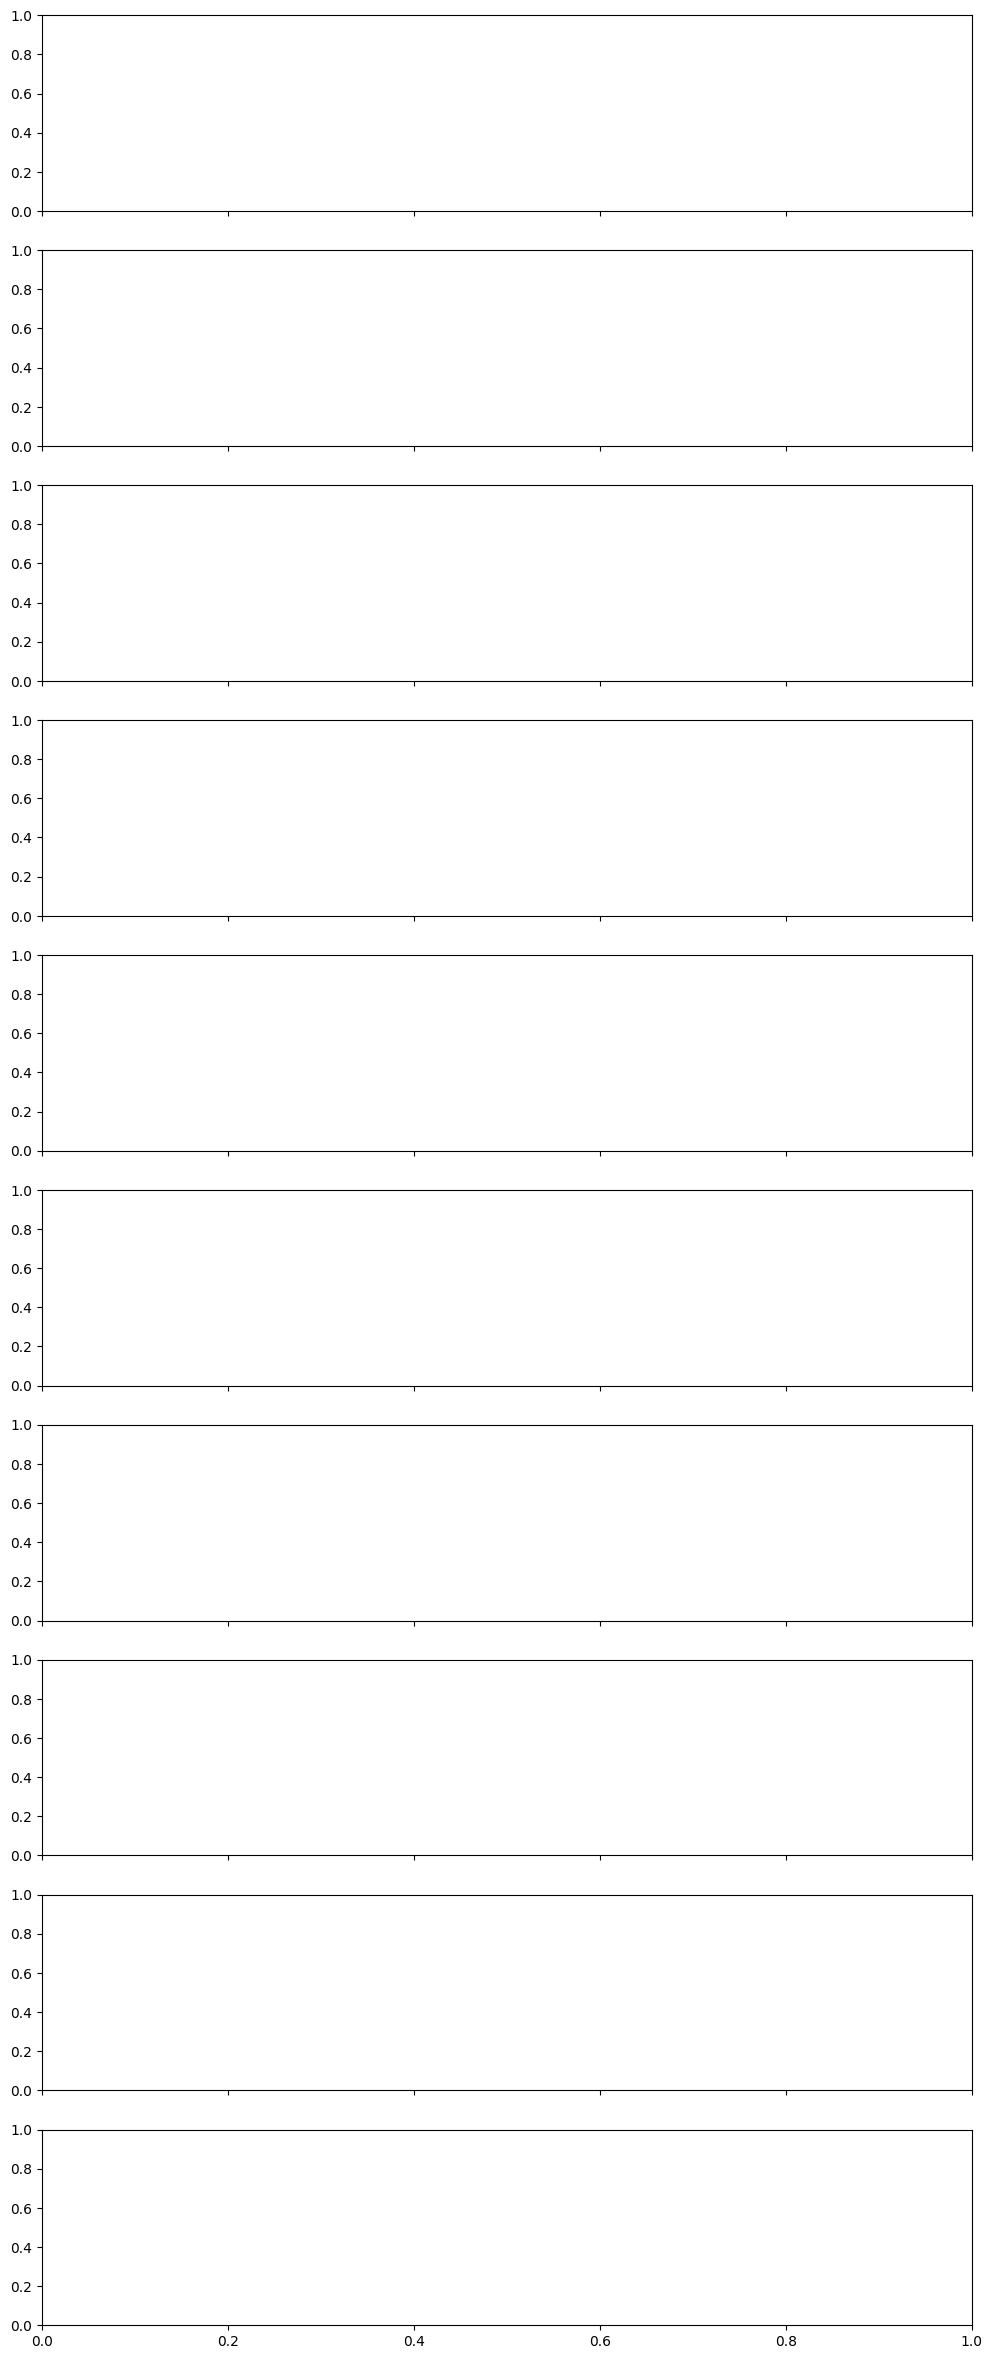

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
# Lista unikalnych lokalizacji z brakami danych
sites = df_air_London['site'].unique()
n = len(sites)

# Fale pandemii jako zakresy dat i kolory
pandemic_phases = [
    ("Początek epidemii i globalna eskalacja", '2019-12-01', '2020-03-01', 'lightgrey'),
    ("Pierwsza fala i lockdowny", '2020-03-01', '2020-06-30', 'lightcoral'),
    ("Okres letni – częściowe poluzowania", '2020-07-01', '2020-09-30', 'lightgreen'),
    ("Druga fala pandemii", '2020-10-01', '2021-01-31', 'lightskyblue'),
    ("Początek kampanii szczepień", '2020-12-01', '2021-03-31', 'khaki'),
    ("Dominacja wariantu Delta i kolejne fale", '2021-04-01', '2021-12-31', 'plum')
]

# Utwórz osobne wykresy dla każdej lokalizacji (bez grupowania po site_type)
fig, axes = plt.subplots(n, 1, figsize=(12, 3 * n), sharex=True)
if n == 1:
    axes = [axes]

for ax, site in zip(axes, sites):
    df_site = df_air_London[df_air_London['site'] == site]
    dates = df_site['date'].astype('datetime64[ns]')
    nox_nan = df_site['nox'].isna()
    no2_nan = df_site['no2'].isna()
    no_nan = df_site['no'].isna()
    co_nan = df_site['co'].isna()
    so2_nan = df_site['so2'].isna()
    o3_nan = df_site['o3'].isna()
    pm10_nan = df_site['pm10'].isna()
    pm25_nan = df_site['pm2.5'].isna()

    ax.scatter(dates[nox_nan], ['nox']*nox_nan.sum(), color='blue', label='nox NaN', marker='|')
    ax.scatter(dates[no2_nan], ['no2']*no2_nan.sum(), color='green', label='no2 NaN', marker='|')
    ax.scatter(dates[no_nan], ['no']*no_nan.sum(), color='red', label='no NaN', marker='|')
    ax.scatter(dates[co_nan], ['co']*co_nan.sum(), color='orange', label='co NaN', marker='|')
    ax.scatter(dates[so2_nan], ['so2']*so2_nan.sum(), color='purple', label='so2 NaN', marker='|')
    ax.scatter(dates[o3_nan], ['o3']*o3_nan.sum(), color='brown', label='o3 NaN', marker='|')
    ax.scatter(dates[pm10_nan], ['pm10']*pm10_nan.sum(), color='pink', label='pm10 NaN', marker='|')
    ax.scatter(dates[pm25_nan], ['pm2.5']*pm25_nan.sum(), color='cyan', label='pm2.5 NaN', marker='|')     

    # Dodanie zakresów pandemicznych jako tła
    for phase, start, end, color in pandemic_phases:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)

    ax.set_ylabel('Zanieczyszczenie')
    ax.set_title(f'Lokalizacja: {site}')
    ax.grid(True)

# Dodanie legendy pandemicznych faz pod wykresami
legend_patches = [mpatches.Patch(color=color, label=phase) for phase, _, _, color in pandemic_phases]
plt.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=2)

plt.xlabel('Rok')
plt.suptitle('Braki danych (NaN) dla no, nox, no2, co, so2, o3\nFale pandemii oznaczone kolorami (tylko lokalizacje zawierające "London")')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [6]:
#usuwnie kolumn z ramki danych df_air_London
df_air_London = df_air_London.drop(columns=['latitude', 'longitude', 'co','so2','nv10','nv2.5','v10','v2.5','ws', 'wd','air_temp','no','nox','code'])
# zapisanie df_air_London do pliku csv
df_air_London.to_csv("Dane/df_air_London.csv", index=False)

NameError: name 'df_air_London' is not defined

In [13]:
df_air_London = pd.read_csv("C:\GITHUB\SAD-1\Dane/df_air_London.csv")

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\DAMIANGUTOWSKI\AppData\Local\Temp\ipykernel_16852\1089907981.py:1: SyntaxWarning: invalid escape sequence '\G'
  df_air_London = pd.read_csv("C:\GITHUB\SAD-1\Dane/df_air_London.csv")


In [ ]:
#Wyznaczanie braków dla so2 

In [ ]:
#usuwanie niepotrzebnych kolumn z pliku ltla_newCasesBySpecimenDate.csv
# zawężenie danych do tych, które dotyczą Londynu

#ramka danych z ltla_newCasesBySpecimenDate
df_ltla = pd.read_csv("Dane/ltla_newCasesBySpecimenDate.csv")

#usuwanie kolumn z ramki danych df_ltla
df_ltla = df_ltla.drop(columns=['metric','metric_name'])



#dane dla area_name zawierającej 'London'
df_ltla = df_ltla[df_ltla['area_name'].str.contains("London")]
# wydrukuj liczbę wierszy
df_ltla.count()

# zapisanie df_ltla do pliku csv
df_ltla.to_csv("Dane/ltla_newCasesBySpecimenDate.csv", index=False)

KeyError: "['metric', 'metric_name'] not found in axis"

In [ ]:
#uzupełnienie brakujących wartości w ramce df_air_London w kolumnie 'no2', 'o3' i 'pm2.5' za pomocą interpolacji liniowej

#### interpolacja do skończenia


df_air_London['no2'] = df_air_London['no2'].interpolate(method='linear')
df_air_London['o3'] = df_air_London['o3'].interpolate(method='linear')
df_air_London['pm2.5'] = df_air_London['pm2.5'].interpolate(method='linear')


## Wyznaczanie wskaźnika AQI
Dla każdego zanieczyszczenia wyliczany jest wskażnik **IAQI**
<br />

$$\ I = \frac {I_{high} - I_{low}}{C_{high} - C_{low}}\left( C - C_{low} \right) + I_{low} $$
<br />
Gdzie: <br />
 I – Air Quality indeks, <br />
 C – Zmierzone stężenie, <br />
 C<sub>low</sub> , C<sub>high</sub> – górna i dolna granica przedziału, w którym mieści się C,<br />
 I<sub>low</sub> , I<sub>high</sub> – wartości indeksu jakości powietrza odpowiadające tym granicom.


In [ ]:
# aqi biblioteki i liczenie AQI
# pip install python-aqi

# https://pypi.org/project/python-aqi/ - link do dokumentacji
# https://github.com/hrbonz/python-aqi/tree/master/aqi - github projektu
                  
%pip install python-aqi
import aqi

# utworzenie ramki danych df_air_YK11 z pliku df_air_YK11.csv
#df_air_YK11 = pd.read_csv("C:\GITHUB\SAD-1\Dane/df_air_YK11.csv")

# For each row in df_air_YK11, calculate AQI and add it to a new column
def calc_aqi(row):
    try:
        if pd.notna(row['o3']) and pd.notna(row['no2']) and pd.notna(row['pm2.5']):
            return aqi.to_aqi([(aqi.POLLUTANT_O3_1H, row['o3']), (aqi.POLLUTANT_NO2_1H, row['no2']), (aqi.POLLUTANT_PM25, row['pm2.5'])], algo=aqi.ALGO_EPA)
        else:
            return None
    except Exception:
        return None
df_air_London['AQI'] = df_air_London.apply(calc_aqi, axis=1)

# dane z df_air_London z kolumną AQI nie zawierającą wartości None
#print(df_air_London[df_air_London['AQI'].notna()])

df_air_London.count()


Note: you may need to restart the kernel to use updated packages.


Unnamed: 0    765383
site          765383
date          765383
no2           765383
o3            687815
pm2.5         765383
site_type     765383
AQI             2472
dtype: int64

Graficzna prezentacja infoormacji o danych 

Wyświetlenie grafik z brakami danych dla czujników z lokalizacj zawierających w nazwie London
